# Master Quantum Mitigation Experiments
This notebook uses `backend_utils.py` and `mitiq_utils.py` to run and compare ZNE, PEC, and LRE across circuit depths.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from backend_utils_updated_3 import get_backend, get_circuit
from backend_utils_updated_3 import execute as full_execute

from mitiq_utils_2 import run_experiment, test_depths, plot_heatmap


In [12]:
# Experiment parameters
circuit_type = "mirror"        # Benchmark: 'rb', 'mirror', 'ghz', 'long cnot'
n_qubits = 3                   # Number of logical qubits
depths = list(range(1, 11, 2)) # Depths from 1 to 9, step 2
seeds = list(range(5))         # Use seeds 0-4 for averaging

backend_name = "FakeLimaV2"
use_ideal = False              # Use noisy simulator
shots = 10_000                 # Shots per circuit
scale_factors = [1.0, 2.0, 3.0]# ZNE scale factors
pec_samples = 100              # PEC number of samples
lre_degree = 1                 # LRE polynomial degree
lre_fold = 2.0                 # LRE fold multiplier


In [13]:
# Define executor function returning expectation of |0...0>
def executor(circuit, backend):
    qc = circuit.copy()
    qc.measure_all()
    transpiled = qiskit.transpile(qc, backend=backend, optimization_level=0)
    job = backend.run(transpiled, shots=shots)
    counts = job.result().get_counts()
    key = '0' * circuit.num_qubits
    return counts.get(key, 0) / shots


In [ ]:
from functools import partial
executor = partial(
    full_execute,
    shots=shots,
    correct_bitstring="0"*n_qubits,
    verbose=verbose
)


In [14]:
# Run depth sweeps for each mitigation method
methods = ['zne', 'pec', 'lre']
results = {}
for method in methods:
    results[method] = test_depths(
        method=method,
        executor=executor,
        circuit_type=circuit_type,
        n_qubits=n_qubits,
        depths=depths,
        seeds=seeds,
        backend_name=backend_name,
        use_ideal=use_ideal,
        scale_factors=scale_factors,
        pec_num_samples=pec_samples,
        lre_degree=lre_degree,
        lre_fold=lre_fold,
        random_state=42
    )
results


c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_0: ───X^-0.5───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_1: ───Ry(-0.5π)───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_2: ───Ry(-0.5π)───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_0: ───X───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_1: ───X^0.5───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_2: ───X^-0.5───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representatio

KeyboardInterrupt: 

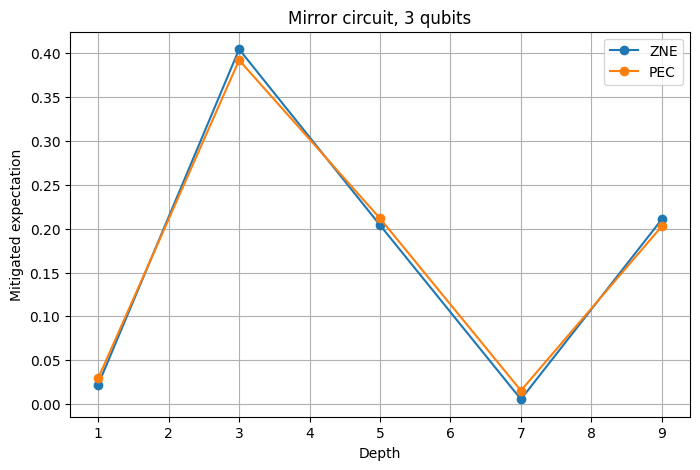

In [15]:
# Plot average mitigated expectation vs depth
plt.figure(figsize=(8,5))
for method, res in results.items():
    plt.plot(depths, [res[d] for d in depths], marker='o', label=method.upper())
plt.title(f"{circuit_type.capitalize()} circuit, {n_qubits} qubits")
plt.xlabel("Depth")
plt.ylabel("Mitigated expectation")
plt.legend()
plt.grid(True)


## Example Heatmap: Raw values for ZNE
Below is how you could heatmap depth vs seed expectation values (add more methods as needed).

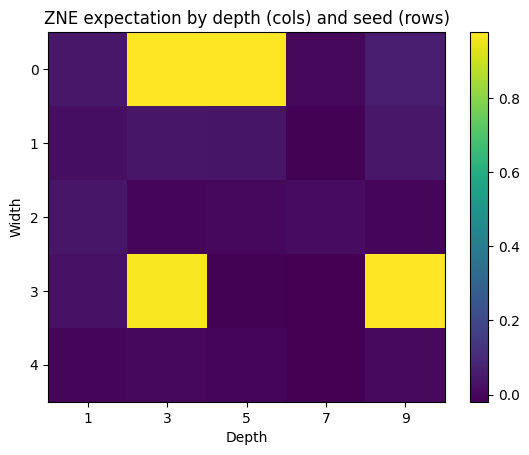

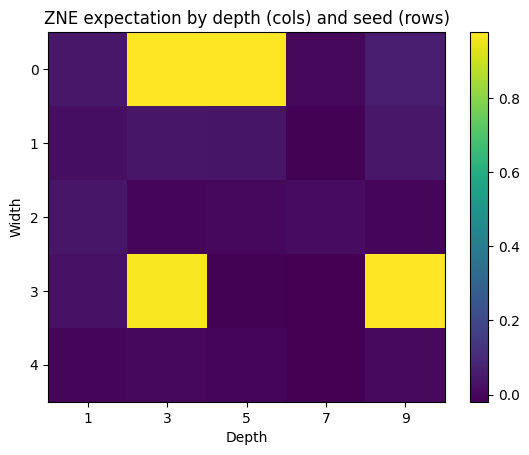

In [18]:
# Prepare matrix for ZNE: rows=seeds, cols=depths
from mitiq_utils_2 import test_depths
zne_matrix = np.array([
    [run_experiment(
        method='zne',
        executor=executor,
        circuit_type=circuit_type,
        n_qubits=n_qubits,
        depth=d,
        seed=s,
        backend_name=backend_name,
        use_ideal=use_ideal,
        scale_factors=scale_factors,
        random_state=s
    ) for d in depths]
    for s in seeds
])
fig = plot_heatmap(zne_matrix, depths, seeds, "ZNE expectation by depth (cols) and seed (rows)")
fig
